# Welter


Updated July 25, 2016

## Compile all the photometry into a single master file.
Include all UBVRI data and uncertainties.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('ticks')

In [3]:
import pandas as pd

## Grankin et al. 2008  Data

Assign uncertainty in $V$ for the Grankin data.
From Grankin et al. 2008: 
> The rms error of a single measurement in the instrumental system for a star brighter than 12 mag in $V$ is about 0.01 in $BVR$ and 0.05 in $U$.

In [4]:
gr_data = pd.read_csv('../data/photometry/LkCa4_grankin.dat')

In [5]:
gr_data['Bmag']=gr_data['B_V']+gr_data['Vmag']
gr_data['Rmag']=gr_data['Vmag']-gr_data['V_R']
gr_data['Umag']=gr_data['U_B']+gr_data['Bmag']

In [6]:
gr_data['Berr']=0.01
gr_data['Verr']=0.01
gr_data['Rerr']=0.01
gr_data['Uerr']=0.05

In [7]:
gr_data['date_type'], gr_data['source'], gr_data['n_obs'] = 'HJD', 'Grankin et al. 2008', 1.0

gr_data = gr_data.rename(columns={"HJD":"JD_like"})

In [8]:
gr_data.drop(['U_B', 'B_V', 'V_R'], axis=1, inplace=True)

In [9]:
gr_data.head()

,JD_like,Vmag,Bmag,Rmag,Umag,Berr,Verr,Rerr,Uerr,date_type,source,n_obs
0,2.448858e+06,12.613,14.054,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
1,2.448859e+06,12.336,13.736,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
2,2.448860e+06,12.702,14.183,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
3,2.448861e+06,12.696,14.114,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
4,2.448862e+06,12.334,13.743,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0


## Use Aggregated ASASSN Data

In [10]:
fn = '../data/photometry/LkCa4_ASASSN_aggregated.dat'
dat = pd.read_csv(fn)

In [11]:
dat['date_type'], dat['source'] = 'JD', 'ASASSN'
dat = dat.rename(columns={"mean_mag":"Vmag", "stddev":"Verr", "JD":"JD_like"})

In [12]:
dat.head()

,JD_like,Vmag,Verr,n_obs,date_type,source
0,2.455947e+06,12.84,0.01,1.0,JD,ASASSN
1,2.455947e+06,12.75,0.01,1.0,JD,ASASSN
2,2.455951e+06,12.65,0.01,1.0,JD,ASASSN
3,2.455951e+06,12.64,0.01,1.0,JD,ASASSN
4,2.455953e+06,13.04,0.01,2.0,JD,ASASSN


## Bonus Grankin data from 2013

In [13]:
gr_bonus = pd.read_csv('../data/photometry/LkCa4_2013_grankin_bonus.dat', delim_whitespace=True)

In [14]:
gr_bonus['HJD'] = gr_bonus['HJD+2456000'] + 2456000.0

In [15]:
gr_bonus['date_type'], gr_bonus['source'], gr_bonus['n_obs'] = 'HJD', 'Donati et al. 2014', 1.0

In [16]:
gr_bonus['Verr'] = 0.01
gr_bonus = gr_bonus.\
    rename(columns={"V_mag":"Vmag", "HJD":"JD_like"}).\
    drop(['HJD+2456000'], axis=1)

In [17]:
gr_bonus.head()

,Vmag,JD_like,date_type,source,n_obs,Verr
0,12.780,2.456538e+06,HJD,Donati et al. 2014,1.0,0.01
1,12.819,2.456548e+06,HJD,Donati et al. 2014,1.0,0.01
2,12.942,2.456578e+06,HJD,Donati et al. 2014,1.0,0.01
3,12.821,2.456594e+06,HJD,Donati et al. 2014,1.0,0.01
4,12.699,2.456596e+06,HJD,Donati et al. 2014,1.0,0.01


## Integral OMC

In [18]:
omc = pd.read_csv('../data/photometry/LkCa4_Integral_OMC.csv')

In [19]:
omc['date_type'] = 'HJD'
omc['source'] = 'Integral-OMC'
omc.rename(columns={'HJD':'JD_like'}, inplace=True)

In [20]:
omc.head()

,JD_like,Vmag,Verr,date_type,source
0,2.453949e+06,13.007421,0.029357,HJD,Integral-OMC
1,2.453949e+06,13.036949,0.030502,HJD,Integral-OMC
2,2.453949e+06,13.053765,0.032617,HJD,Integral-OMC
3,2.453949e+06,13.032140,0.030567,HJD,Integral-OMC
4,2.453949e+06,12.923807,0.034285,HJD,Integral-OMC


## Herbst and Shevchenko 1999
(Really the data is from Vrba et al. 1993 and Bouvier et al. 1993.)

In [21]:
hs99 = pd.read_csv('../data/photometry/LkCa4_herbst99.dat')

In [22]:
hs99.drop(['U-B','B-V','V-R','R-I', 'Note', 'Ref'], axis=1, inplace=True)

In [23]:
hs99['Verr'], hs99['Berr'], hs99['Rerr'], hs99['Ierr'],hs99['Uerr'] = 0.01,0.01,0.01,0.01,0.05

In [24]:
hs99['date_type'] = 'JD'
hs99.rename(columns={'JD':'JD_like'}, inplace=True)

In [25]:
hs99.head()

,JD_like,Vmag,Bmag,Rmag,Imag,Umag,source,Verr,Berr,Rerr,Ierr,Uerr,date_type
0,2446357.450,12.67,14.12,11.71,10.70,15.32,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
1,2446358.808,12.47,13.94,11.55,10.56,15.15,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
2,2446359.001,12.49,13.97,11.57,10.58,15.18,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
3,2446361.961,12.46,13.92,11.53,10.53,15.11,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
4,2446362.763,12.56,14.03,11.64,10.66,15.31,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD


## ASAS3

In [26]:
as3 = pd.read_csv('../data/photometry/LkCa4_asas3.csv')

In [27]:
as3.head()

,JD_like,date_type,Vmag,Verr,source
0,2.452661e+06,HJD,13.019,0.054,ASAS3
1,2.452878e+06,HJD,13.049,0.037,ASAS3
2,2.452916e+06,HJD,12.881,0.034,ASAS3
3,2.452934e+06,HJD,13.068,0.029,ASAS3
4,2.452946e+06,HJD,12.645,0.038,ASAS3


## AAVSO

In [28]:
names = ['JD_like', 'Bmag', 'Imag','Rmag','Vmag','Berr', 'Ierr', 'Rerr', 'Verr']

In [29]:
aav = pd.read_csv('../data/photometry/LkCa4_aavso.csv', skiprows=[0,1,2], names=names)

In [30]:
aav['date_type'] = 'JD'
aav['source'] = 'AAVSO'

In [31]:
aav.head()

,JD_like,Bmag,Imag,Rmag,Vmag,Berr,Ierr,Rerr,Verr,date_type,source
0,2.456651e+06,14.285,NaN,NaN,NaN,0.021,NaN,NaN,NaN,JD,AAVSO
1,2.456651e+06,NaN,NaN,NaN,12.648,NaN,NaN,NaN,0.009,JD,AAVSO
2,2.456651e+06,NaN,NaN,11.608,NaN,NaN,NaN,0.006,NaN,JD,AAVSO
3,2.456651e+06,NaN,10.549,NaN,NaN,NaN,0.007,NaN,NaN,JD,AAVSO
4,2.456651e+06,NaN,NaN,NaN,13.090,NaN,NaN,NaN,0.010,JD,AAVSO


## Concatenate all photometry into a "database"

In [32]:
master = pd.concat([dat, gr_data, gr_bonus, omc, hs99, as3, aav], join='outer', ignore_index=True, axis=0)

In [34]:
master.head()

,Berr,Bmag,Ierr,Imag,JD_like,Rerr,Rmag,Uerr,Umag,Verr,Vmag,date_type,n_obs,source
0,NaN,NaN,NaN,NaN,2.455947e+06,NaN,NaN,NaN,NaN,0.01,12.84,JD,1.0,ASASSN
1,NaN,NaN,NaN,NaN,2.455947e+06,NaN,NaN,NaN,NaN,0.01,12.75,JD,1.0,ASASSN
2,NaN,NaN,NaN,NaN,2.455951e+06,NaN,NaN,NaN,NaN,0.01,12.65,JD,1.0,ASASSN
3,NaN,NaN,NaN,NaN,2.455951e+06,NaN,NaN,NaN,NaN,0.01,12.64,JD,1.0,ASASSN
4,NaN,NaN,NaN,NaN,2.455953e+06,NaN,NaN,NaN,NaN,0.01,13.04,JD,2.0,ASASSN


## Convert Julian Dates to year, month, day

From JiffyClub's [gist](https://gist.github.com/jiffyclub/1294443):

In [35]:
import math
import datetime as dt

In [36]:
@np.vectorize
def jd_to_date(jd):
    """
    Convert Julian Day to date.
    
    Algorithm from 'Practical Astronomy with your Calculator or Spreadsheet', 
        4th ed., Duffet-Smith and Zwart, 2011.
    
    Parameters
    ----------
    jd : float
        Julian Day
        
    Returns
    -------
    year : int
        Year as integer. Years preceding 1 A.D. should be 0 or negative.
        The year before 1 A.D. is 0, 10 B.C. is year -9.
        
    month : int
        Month as integer, Jan = 1, Feb. = 2, etc.
    
    day : float
        Day, may contain fractional part.
        
    Examples
    --------
    Convert Julian Day 2446113.75 to year, month, and day.
    
    >>> jd_to_date(2446113.75)
    (1985, 2, 17.25)
    
    """
    jd = jd + 0.5
    
    F, I = math.modf(jd)
    I = int(I)
    
    A = math.trunc((I - 1867216.25)/36524.25)
    
    if I > 2299160:
        B = I + 1 + A - math.trunc(A / 4.)
    else:
        B = I
        
    C = B + 1524
    
    D = math.trunc((C - 122.1) / 365.25)
    
    E = math.trunc(365.25 * D)
    
    G = math.trunc((C - E) / 30.6001)
    
    day = C - E + F - math.trunc(30.6001 * G)
    
    if G < 13.5:
        month = G - 1
    else:
        month = G - 13
        
    if month > 2.5:
        year = D - 4716
    else:
        year = D - 4715
        
    return year, month, day
    

In [37]:
master['year'], master['month'], master['day'] = jd_to_date(master.JD_like.values)

# Break the observations into **seasons**
Seasons are divided by their observability (can't observe towards the sun!):

In [38]:
#sns.distplot(dat.month, rug=True, bins=np.arange(0,12,1))

In [39]:
#sns.distplot(gr_data.month, rug=True, bins=np.arange(0,12,1))

May is the dividing line (makes sense, the sun is in Taurus in May... e.g. my birthday is May 6th and I am a Taurus).

In [40]:
def assign_season(df):
    '''takes in a dataFrame possessing year and month, appends a season column.
    '''
    df['season'] = df.year - 1985
    next_ids = df.month > 5
    df.season[next_ids] += 1
    return df

In [41]:
master = assign_season(master)

In [42]:
master = master[['JD_like', 'year', 'month', 'day', 'season', 
                'Vmag', 'Verr', 'Bmag', 'Berr', 'Rmag', 'Rerr', 'Umag', 'Uerr',
                 'source', 'date_type']]

## Light curve analysis

In [43]:
from astroML.time_series import multiterm_periodogram
from astroML.time_series import lomb_scargle

In [44]:
from scipy.signal import argrelmax

Estimate the period separately for each season:

In [45]:
seasons_unsorted = master.season.unique()
seasons_unsorted.sort()
seasons = seasons_unsorted

In [46]:
seasons

array([ 1,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23,
       24, 27, 29, 30, 31])

In [47]:
vals = master.year.unique()

In [48]:
vals.sort()
vals

array([1985, 1986, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2012, 2013, 2014,
       2015, 2016])

In [49]:
len(seasons)

22

In [50]:
max_peaks = np.array([3.375]*22)
P_errs = np.array([0.003]*22)

In [51]:
season_agg = pd.DataFrame({"season":seasons,
                           "P_est1":max_peaks,
                           "P_err1":P_errs})

Add some metadata:

In [52]:
season_agg['years'] = ''
season_agg['N_obs'] = 0

In [53]:
for i in range(22):
    # get the data and best-fit angular frequency
    s = season_agg.season[i]
    ids = master.season == s
    df = master[ids]
    season_agg.years[i] = "{}/{}-{}/{}".format(df.month[df.JD_like.argmin()],
                                               df.year.min(), 
                                               df.month[df.JD_like.argmax()],
                                               df.year.max())
    season_agg.N_obs[i] = len(df.Vmag)

In [54]:
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit

In [55]:
from gatspy.periodic import LombScargle, LombScargleFast

Season 22 did not work for some reason
Season 22 did not work for some reason
Season 23 did not work for some reason
Season 23 did not work for some reason
Season 24 did not work for some reason
Season 24 did not work for some reason
Season 27 did not work for some reason
Season 27 did not work for some reason
Season 30 did not work for some reason
Season 30 did not work for some reason
Season 31 did not work for some reason
Season 31 did not work for some reason


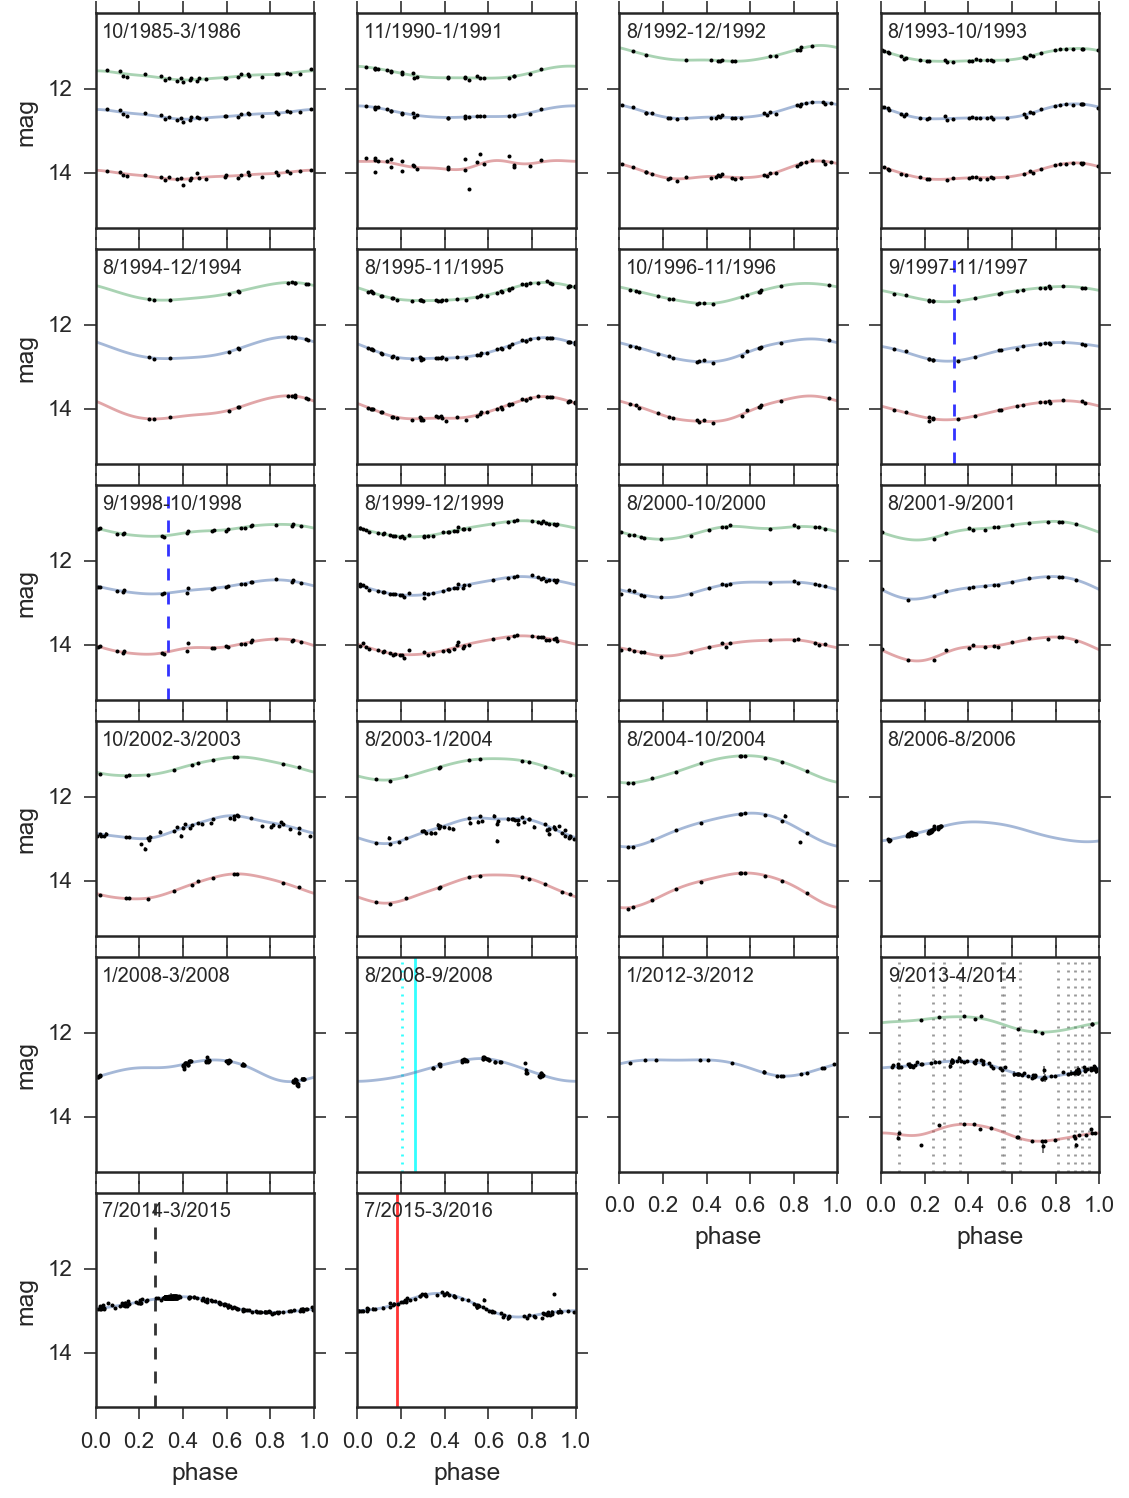

In [95]:
fig = plt.figure(figsize=(8.5, 11))
fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

for i in range(22):
    # get the data and best-fit angular frequency
    s = season_agg.season[i]
    ids = master.season == s
    df = master[ids]
    t = df.JD_like.values
    y = df.Vmag.values
    dy = df.Verr.values
    #this_P = season_agg.P_est1[i]
    this_P = season_agg.P_est1.median()
    phased_t = np.mod(t, this_P)/this_P
    
    # Fit a multiterm model
    Nterms = 4
    reg = 0.1 * np.ones(2 * Nterms + 1)
    reg[:5] = 0 # no regularization on low-order terms
    if (df.year.min() == 2006): 
        reg = 0.3 * np.ones(2 * Nterms + 1)
        reg[:3] = 0 # no regularization on low-order terms

    model = LombScargle(Nterms=4, regularization=reg)
    mask = y == y # We can mask flares later on
    model.fit(t[mask], y[mask], dy[mask])
    tfit = np.linspace(0, this_P, 100)
    yfit = model.predict(tfit, period=this_P)
    
    
    # plot the phased data
    ax = fig.add_subplot(6,4,1 + i)
    plt.plot(tfit/this_P, yfit, alpha=0.5)
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)

    
    #---R-band---
    
    y = df.Rmag.values
    dy = df.Rerr.values
    #this_P = season_agg.P_est1[i]
    this_P = season_agg.P_est1.median()
    phased_t = np.mod(t, this_P)/this_P
    
    # Fit a multiterm model
    Nterms = 4
    reg = 0.1 * np.ones(2 * Nterms + 1)
    reg[:5] = 0 # no regularization on low-order terms

    ax = fig.add_subplot(6,4,1 + i)
    
    model = LombScargle(Nterms=4, regularization=reg)
    mask = y == y # We can mask flares later on
    try:
        model.fit(t[mask], y[mask], dy[mask])
        tfit = np.linspace(0, this_P, 100)
        yfit = model.predict(tfit, period=this_P)
        plt.plot(tfit/this_P, yfit, alpha=0.5)
    except:
        print('Season {} did not work for some reason'.format(s))
    # plot the phased data
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)
    #------------
    
    
    #---B-band---
    
    y = df.Bmag.values
    dy = df.Berr.values
    #this_P = season_agg.P_est1[i]
    this_P = season_agg.P_est1.median()
    phased_t = np.mod(t, this_P)/this_P
    
    # Fit a multiterm model
    Nterms = 4
    reg = 0.1 * np.ones(2 * Nterms + 1)
    reg[:5] = 0 # no regularization on low-order terms

    ax = fig.add_subplot(6,4,1 + i)
    
    model = LombScargle(Nterms=4, regularization=reg)
    mask = y == y # We can mask flares later on
    try:
        model.fit(t[mask], y[mask], dy[mask])
        tfit = np.linspace(0, this_P, 100)
        yfit = model.predict(tfit, period=this_P)
        plt.plot(tfit/this_P, yfit, alpha=0.5)
    except:
        print('Season {} did not work for some reason'.format(s))
    # plot the phased data
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)
    #------------
    
    ax.set_xlim(0, 1)
    ax.set_ylim(plt.ylim()[::-1])
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ylim = ax.get_ylim()
    #ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))
    ax.set_ylim(15.3, 10.2)
    #ax.set_ylim(13.3, 12.2)
    
    ax.text(0.03, 0.96, "{}".format(season_agg.years[i]),
            ha='left', va='top',
            transform=ax.transAxes)
    
    #---Mark observation epochs---
    if (df.JD_like.min() < IG_OBS_date1) & (df.JD_like.max() > IG_OBS_date1):
        IG_phase_1 = np.mod(IG_OBS_date1, this_P)/this_P
        ax.vlines(IG_phase_1, 15.3, 10.2, linestyles='solid', colors='red', alpha=0.8)
        #ax.plot([IG_phase_1], [IG_obs_estV1], 'b*', alpha=0.6, ms=12, 
        #        markeredgecolor='black', markeredgewidth=1)
        
    if (df.JD_like.min() < IG_OBS_date2) & (df.JD_like.max() > IG_OBS_date2):
        IG_phase_2 = np.mod(IG_OBS_date2, this_P)/this_P
        ax.vlines(IG_phase_2, 15.3, 10.2, linestyles='dashed', colors='black', alpha=0.8)

        
    if (df.JD_like.min() < espadons_obsdates.JD_like[j]) & (df.JD_like.max() > espadons_obsdates.JD_like[j]):
        for j in range(len(espadons_obsdates)):
            esp_phase = np.mod(espadons_obsdates.JD_like[j], this_P)/this_P
            ax.vlines(esp_phase, 15.3, 10.2, linestyles='dotted', colors='gray', alpha=0.8)
    
    twomass_obs = 2450781.0
    if (df.JD_like.min()-300 < twomass_obs) & (df.JD_like.max()+300 > twomass_obs):
        tm_phase = np.mod(twomass_obs, this_P)/this_P
        ax.vlines(tm_phase, 15.3, 10.2, linestyles='dashed', colors='blue', alpha=0.8)

    #dblspc_obs = 2454826.0
    # This is the Double Spec spectrograph data acquired by GJH.
    dblspc_obs = 2454830.77189 #Revised by GJH on July 26, 2015 by checking the FITS header date and time
    if (df.JD_like.min()-120 < dblspc_obs) & (df.JD_like.max()+120 > dblspc_obs):
        dbl_phase = np.mod(dblspc_obs, this_P)/this_P
        ax.vlines(dbl_phase, 15.3, 10.2, linestyles='solid', colors='cyan', alpha=0.8)
        
        # This is the Triple Spec spectrograph data acquired by KCovey.
    tplspc_obs = 2454830.56369 #Revised by GJH on July 26, 2015 by checking the FITS header date and time
    if (df.JD_like.min()-120 < tplspc_obs) & (df.JD_like.max()+120 > tplspc_obs):
        tpl_phase = np.mod(tplspc_obs, this_P)/this_P
        ax.vlines(tpl_phase, 15.3, 10.2, linestyles='dotted', colors='cyan', alpha=0.8)
    
    if i < 18 :
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i % 4 != 0:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i % 4 == 0:
        ax.set_ylabel('mag')

    if i in (18, 19, 20, 21):
        ax.set_xlabel('phase')
        

plt.savefig('../results/fig/polychrom_22seasons_monitoring.png')

## R mag

Need to correct the R errors to be NaN if the Rmag is NaN

In [63]:
master.Rerr[master.Rmag != master.Rmag] = np.NaN

In [77]:
IG_OBS_date1 = 2457344.8609722229
IG_OBS_date2 = 2456990.790381945

espadons_obsdates = pd.read_csv('../data/photometry/ESPaDoNs_LkCa4_obsdates.csv', sep='\s+')
espadons_obsdates['JD_like'] =  espadons_obsdates['bjd-2456000'] + 2456000.0

Season {22} did not work for some reason
Season {23} did not work for some reason
Season {24} did not work for some reason
Season {27} did not work for some reason
Season {30} did not work for some reason
Season {31} did not work for some reason


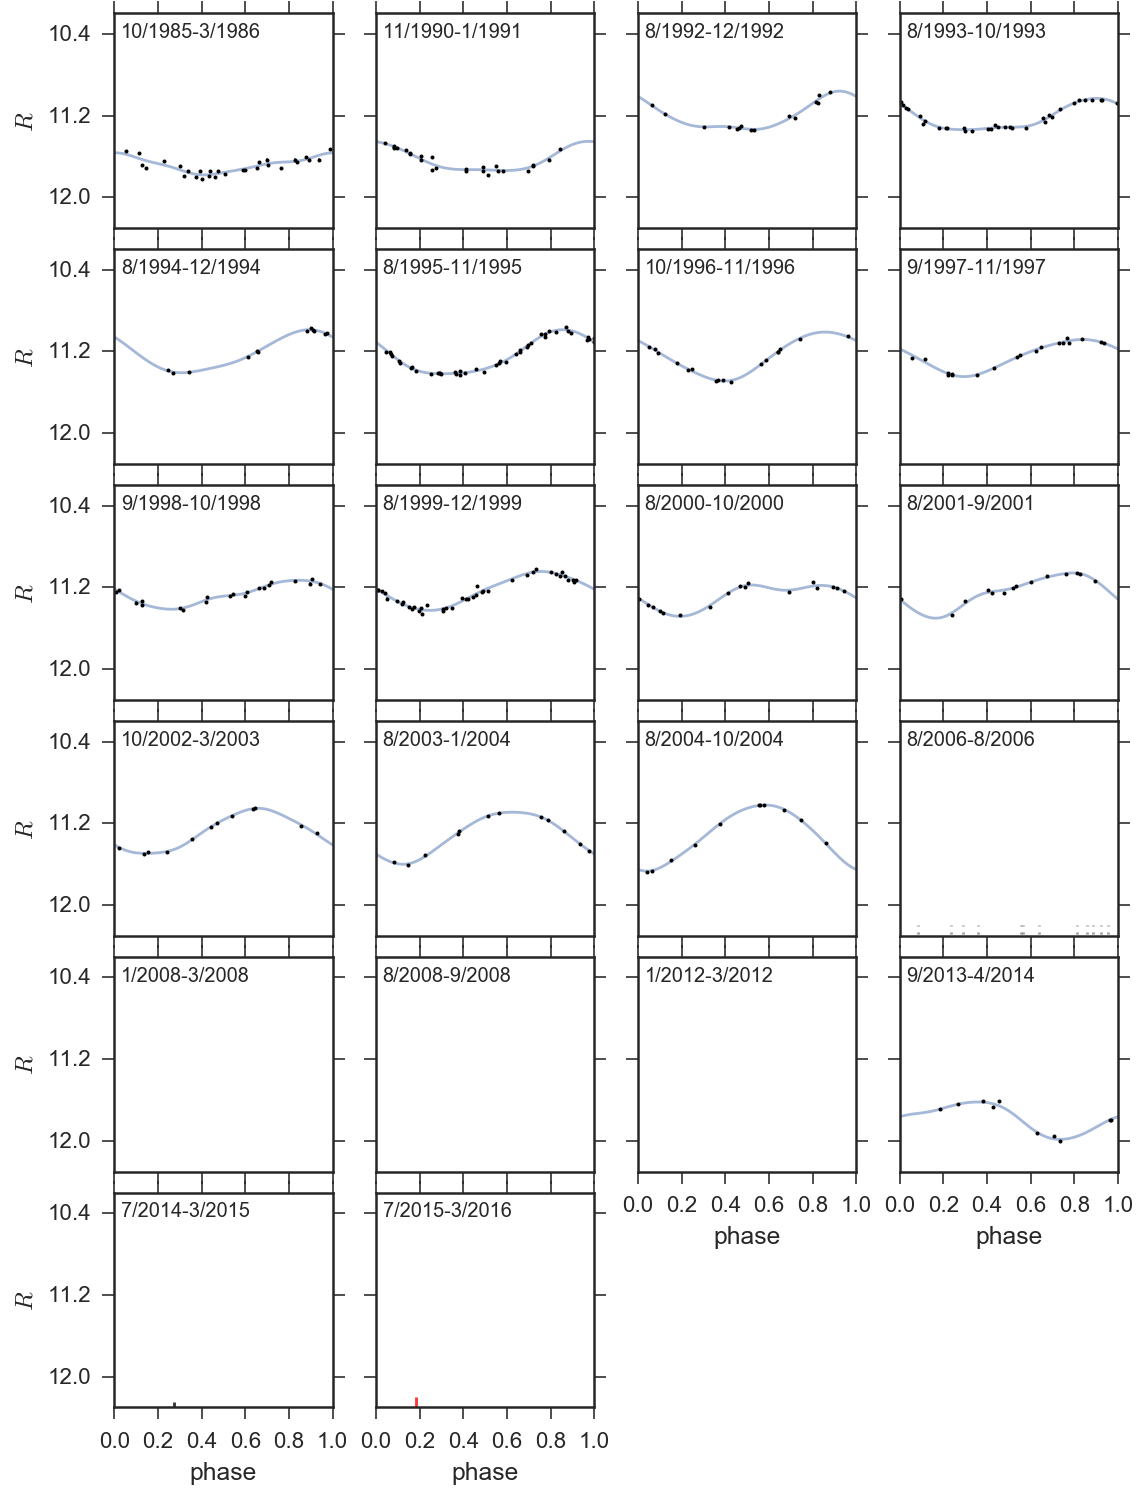

In [80]:
fig = plt.figure(figsize=(8.5, 11))
fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

for i in range(22):
    # get the data and best-fit angular frequency
    s = season_agg.season[i]
    ids = master.season == s
    df = master[ids]
    t = df.JD_like.values
    y = df.Rmag.values
    dy = df.Rerr.values
    #this_P = season_agg.P_est1[i]
    this_P = season_agg.P_est1.median()
    phased_t = np.mod(t, this_P)/this_P
    
    # Fit a multiterm model
    Nterms = 4
    reg = 0.1 * np.ones(2 * Nterms + 1)
    reg[:5] = 0 # no regularization on low-order terms

    ax = fig.add_subplot(6,4,1 + i)
    
    model = LombScargle(Nterms=4, regularization=reg)
    mask = y == y # We can mask flares later on
    try:
        model.fit(t[mask], y[mask], dy[mask])
        tfit = np.linspace(0, this_P, 100)
        yfit = model.predict(tfit, period=this_P)
        plt.plot(tfit/this_P, yfit, alpha=0.5)
    except:
        print('Season {} did not work for some reason'.format({s}))
    # plot the phased data
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)

    ax.set_xlim(0, 1)
    ax.set_ylim(plt.ylim()[::-1])
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ylim = ax.get_ylim()
    #ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))
    ax.set_ylim(12.3, 10.2)
    
    ax.text(0.03, 0.96, "{}".format(season_agg.years[i]),
            ha='left', va='top',
            transform=ax.transAxes)
    
    
    if i < 18 :
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i % 4 != 0:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i % 4 == 0:
        ax.set_ylabel('$R$')

    if i in (18, 19, 20, 21):
        ax.set_xlabel('phase')



## Add in the Spectral Observation epochs

In [ ]:
IG_OBS_date1 = 2457344.8609722229
IG_OBS_date2 = 2456990.790381945

espadons_obsdates = pd.read_csv('../data/photometry/ESPaDoNs_LkCa4_obsdates.csv', sep='\s+')
espadons_obsdates['JD_like'] =  espadons_obsdates['bjd-2456000'] + 2456000.0

`V_est1` will be an estimate of V from the multi-term model shown in the below figure.  Note that there will no uncertainty associated with `V_est1`.

In [ ]:
espadons_obsdates['V_est1'] = np.NaN

In [ ]:
nirspec_date = 2452606.500000

In [ ]:
fig = plt.figure(figsize=(8.5, 11))
fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

for i in range(17):
    # get the data and best-fit angular frequency
    s = season_agg.season[i]
    ids = master.season == s
    df = master[ids]
    t = df.JD_like.values
    y = df.Vmag.values
    dy = df.Verr.values
    #this_P = season_agg.P_est1[i]
    this_P = season_agg.P_est1.median()
    phased_t = np.mod(t, this_P)/this_P
    
    # Fit a multiterm model
    Nterms = 4
    reg = 0.1 * np.ones(2 * Nterms + 1)
    reg[:5] = 0 # no regularization on low-order terms

    model = LombScargle(Nterms=4, regularization=reg)
    mask = y == y # We can mask flares later on
    model.fit(t[mask], y[mask], dy[mask])
    tfit = np.linspace(0, this_P, 100)
    yfit = model.predict(tfit, period=this_P)
    
    
    # plot the phased data
    ax = fig.add_subplot(5,4,1 + i)
    plt.plot(tfit/this_P, yfit, alpha=0.5)
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)

    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(plt.ylim()[::-1])
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ylim = ax.get_ylim()
    #ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))
    ax.set_ylim(13.3, 12.2)

    if (df.JD_like.min() < IG_OBS_date1) & (df.JD_like.max() > IG_OBS_date1):
        IG_phase_1 = np.mod(IG_OBS_date1, this_P)/this_P
        ax.vlines(IG_phase_1, 13.3, 12.2, linestyles='solid', colors='red', alpha=0.8)
        IG_obs_estV1 = model.predict(np.mod(IG_OBS_date1, this_P), period=this_P)
        #ax.plot([IG_phase_1], [IG_obs_estV1], 'b*', alpha=0.6, ms=12, 
        #        markeredgecolor='black', markeredgewidth=1)
        
    if (df.JD_like.min() < IG_OBS_date2) & (df.JD_like.max() > IG_OBS_date2):
        IG_phase_2 = np.mod(IG_OBS_date2, this_P)/this_P
        ax.vlines(IG_phase_2, 13.3, 12.2, linestyles='dashed', colors='black', alpha=0.8)
        IG_obs_estV2 = model.predict(np.mod(IG_OBS_date2, this_P), period=this_P)
        
    if (df.JD_like.min() < nirspec_date) & (df.JD_like.max() > nirspec_date):
        nirspec_phase = np.mod(nirspec_date, this_P)/this_P
        nirspec_phase_unc = np.mod(nirspec_date+1, this_P)/this_P
        #ax.vlines(nirspec_phase, 13.3, 12.2, linestyles='dashdot', colors='black', alpha=0.8)
        #ax.vlines(nirspec_phase_unc, 13.3, 12.2, linestyles='dashdot', colors='black', alpha=0.8)
        
    if (s == 22):
        for j in range(len(espadons_obsdates)):
            esp_phase = np.mod(espadons_obsdates.JD_like[j], this_P)/this_P
            espadons_obsdates.V_est1[j] = model.predict(np.mod(esp_phase*this_P, this_P), period=this_P)
            ax.vlines(esp_phase, 13.3, 12.2, linestyles='dotted', colors='gray', alpha=0.8)
    
    ax.text(0.03, 0.96, "{}".format(season_agg.years[i]),
            ha='left', va='top',
            transform=ax.transAxes)
    
    if i < 13 :
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i % 4 != 0:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i % 4 == 0:
        ax.set_ylabel('$V$')

    if i in (13, 14, 15, 16):
        ax.set_xlabel('phase')

plt.savefig('../document/figures/all_LCs_phase.pdf', bbox_inches='tight')

## Uncertainty in the period estimate

In [ ]:
#sns.distplot(season_agg.P_est1, rug=True)

In [ ]:
season_agg.P_est1.std()

In [ ]:
this_P

## Table of estimated $V$ values at the time of observations

In [ ]:
igrins_obsdates = pd.DataFrame({"JD_like": [IG_OBS_date2,IG_OBS_date1],
                               "V_est1":[np.float(IG_obs_estV2), np.float(IG_obs_estV1)],
                               "Instrument":"IGRINS"})

In [ ]:
igrins_obsdates["date_type"] = 'JD'
igrins_obsdates["JD_like-2456000"] = igrins_obsdates.JD_like-2456000.0
igrins_obsdates['year'], igrins_obsdates['month'], igrins_obsdates['day'] = jd_to_date(igrins_obsdates.JD_like.values)
igrins_obsdates = assign_season(igrins_obsdates)

In [ ]:
espadons_obsdates['date_type'] = 'BJD'
espadons_obsdates['Instrument'] = 'ESPaDoNs'
espadons_obsdates["JD_like-2456000"] = espadons_obsdates["bjd-2456000"]
#espadons_obsdates.drop(['month', 'Day'], axis=1, inplace=True)
espadons_obsdates['year'], espadons_obsdates['month'], espadons_obsdates['day'] = jd_to_date(espadons_obsdates.JD_like.values)
espadons_obsdates = assign_season(espadons_obsdates)

Concatenate the IGRINS and ESPaDoNs observations to make a single table.

In [ ]:
tbl_out_raw = pd.concat([espadons_obsdates.drop(['bjd-2456000'], axis=1),
           igrins_obsdates], join='outer', ignore_index=True)

In [ ]:
tbl_out = tbl_out_raw[['JD_like-2456000', 'V_est1', 'Instrument']]

In [ ]:
fmts = [lambda x:"{:0.4f}".format(x),lambda x:"{:0.2f}".format(x), lambda x:"{}".format(x)]

In [ ]:
print(tbl_out.to_latex(index=False, formatters=fmts))

Uncomment to resave, but note that it will over-write the by-hand deluxe table formatting.

In [ ]:
#tbl_out.to_latex('../document/tables/tbl_estV_atObsEpoch.tex', index=False, formatters=fmts)

In [ ]:
#! gsed -i '2i \\\tablecaption{Estimated $V-$band magnitudes\\label{tbl_estimated_V}}' ../document/tables/tbl_estV_atObsEpoch.tex

In [ ]:
tbl_out_raw.to_csv('../data/analysis/V_at_obsEpoch.csv', index=False)

In [ ]:
tbl_out_raw

## The end.